<img src="../imgs/logo.png" width="20%" align="right" style="margin:0px 20px">


# Project: Comparison of Existing Algorithms applied on Flappy Bird

<a href="https://github.com/lplacidet/evolution_project">https://github.com/lplacidet/evolution_project</a>

Importing Libraries

In [1]:
using Cxx

In [ ]:
using Random
using LinearAlgebra
using Statistics
using Plots

gr(reuse=true)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273




## I. CMA-ES Algorithm


Now let's make our random expert and create placeholder fitness and offspring vectors.

In [ ]:

sphere(x::Array{Float64}) = sum((x .- solution).^2)
himmelblau(x::Array{Float64}) = (x[1]^2 + x[2] - 11)^2 + (x[1] + x[2]^2 - 7)^2
styblinski_tang(x::Array{Float64}) = sum(x.^4 .- 16 .* x.^2 .+ 5 .* x) / 2.0
rastrigin(x::Array{Float64}) = 10.0 * length(x) .+ sum((x .- solution).^2 .- 10 .* cos.(2*pi.*(x .- solution)))
objective = sphere

In [14]:
mutable struct CMAEShttp://localhost:8889/notebooks/comparison_evolution.ipynb#
    N::Int
    μ::Int
    λ::Int
    τ::Float64
    τ_c::Float64
    τ_σ::Float64
    population::Array{Array{Float64}}
    offspring::Array{Array{Float64}}
    F_μ::Array{Float64}
    F_λ::Array{Float64}
    C::Array{Float64}
    s::Array{Float64}
    s_σ::Array{Float64}
    σ::Float64
    E::Array{Float64}
    W::Array{Float64}
    x::Array{Float64}
end

In [33]:
N_value = 2
mu = 1
lambda = 10

10

In [34]:
function CMAES(;N=N_value, μ=mu, λ=lambda, τ=sqrt(N), τ_c=N^2, τ_σ=sqrt(N))
    x = randn(N)
    population = fill(x, µ)
    offspring = Array{Array{Float64}}(undef, λ)
    F_µ = Inf .* ones(µ)
    F_λ = Inf .* ones(λ)
    C = Array(Diagonal{Float64}(I, N))
    s = zeros(N)
    s_σ = zeros(N)
    σ = 1.0
    E = zeros(N, λ)
    W = zeros(N, λ);
    CMAES(N, μ, λ, τ, τ_c, τ_σ, population, offspring, F_µ, F_λ, C, s, s_σ, σ, E, W, x)
end

CMAES

In [35]:
c = CMAES()

CMAES(2, 1, 10, 1.4142135623730951, 4.0, 1.4142135623730951, Array{Float64,N} where N[[-1.886272222700689, 1.1058401167251015]], Array{Float64,N} where N[#undef, #undef, #undef, #undef, #undef, #undef, #undef, #undef, #undef, #undef], [Inf], [Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf, Inf], [1.0 0.0; 0.0 1.0], [0.0, 0.0], [0.0, 0.0], 1.0, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [-1.886272222700689, 1.1058401167251015])

In [36]:
function step_cmaes!(c::CMAES; obj=objective, visualize=false, anim=Nothing)
    # L1
    sqrt_c = cholesky((c.C + c.C') / 2.0).U
    for i in 1:c.λ
        c.E[:,i] = randn(c.N)
        c.W[:,i] = c.σ * (sqrt_c * c.E[:,i])
        c.offspring[i] = c.x + c.W[:,i]
        c.F_λ[i] = obj(c.offspring[i])
    end    
    # Select new parent population
    idx = sortperm(c.F_λ)[1:c.μ]
    for i in 1:c.μ
        c.population[i] = c.offspring[idx[i]]
        c.F_μ[i] = c.F_λ[idx[i]]
    end    
    # L2
    w = vec(mean(c.W[:,idx], dims=2))
    c.x += w    
    # L3
    c.s = (1.0 - 1.0/c.τ)*c.s + (sqrt(c.μ/c.τ * (2.0 - 1.0/c.τ))/c.σ)*w   
    # L4
    c.C = (1.0 - 1.0/c.τ_c).*c.C + (c.s./c.τ_c)*c.s'    
    # L5
    ɛ = vec(mean(c.E[:,idx], dims=2))
    c.s_σ = (1.0 - 1.0/c.τ_σ)*c.s_σ + sqrt(c.μ/c.τ_σ*(2.0 - 1.0/c.τ_σ))*ɛ    
    # L6
    c.σ = c.σ*exp(((c.s_σ'*c.s_σ)[1] - c.N)/(2*c.N*sqrt(c.N)))
    if visualize
        plot(xs, ys, fz, st=:contour)
        scatter!([c.offspring[i][1] for i in 1:λ], [c.offspring[i][2] for i in 1:λ], 
            xlims=(-5, 5), ylims=(-5, 5), legend=:none)
        scatter!([c.x[1]], [c.x[2]], color=:black, marker=:rect,
            xlims=(-5, 5), ylims=(-5, 5), legend=:none)
        frame(anim)
    end
    c
end

step! (generic function with 1 method)

In [37]:
function plot_obj_cmaes()
    c = CMAES()
    println("x initial: ", c.x)
    anim = Animation()
    for i in 1:100
        v = mod(i, 1) == 0
        step_cmaes!(c, visualize=v, anim=anim)
    end
    println("x final: ", c.x)
    gif(anim)
end

plot_obj (generic function with 1 method)

[3.5, -0.2]
x initial: [-0.16148379552805434, -0.5367540886760964]
x final: [0.5151442968734533, -0.19999999937068977]


┌ Info: Saved animation to 
│   fn = /Users/louiseplacidet/Desktop/Algorithmes Evolutionnaires/evolution/5_strategies/tmp.gif
└ @ Plots /Users/louiseplacidet/.julia/packages/Plots/NVH6y/src/animation.jl:102


Plots.AnimatedGif("/Users/louiseplacidet/Desktop/Algorithmes Evolutionnaires/evolution/5_strategies/tmp.gif")
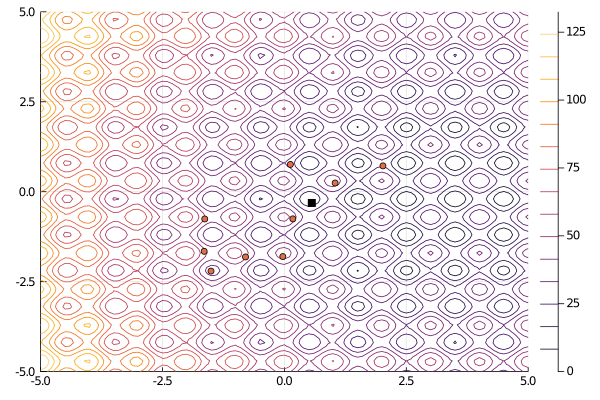

In [41]:
xs = -5.0:0.1:5.0
ys = -5.0:0.1:5.0

objective = rastrigin # sphere, himmelblau, styblinski_tang, rastrigin
fz(x, y) = objective([x, y])
println(solution) # optimal for sphere and rastrigin
plot_obj_cmaes()



## II. ES (mu/signam, lambda)


In [ ]:
s = [3.5, -0.2]
sphere(x::Array{Float64}) = -sum((x .- s).^2)
objective = sphere

In [ ]:
npop = 50     # population size
sigma = 0.1   # noise standard deviation
alpha = 0.001 # step size
x = randn(2)  # initial expert

In [ ]:
xs = -5.0:0.1:5.0
ys = -5.0:0.1:5.0
fz(x, y) = objective([x, y]);

function step_es(x::Array{Float64}; npop=50, sigma=0.1, alpha=0.01, visualize=false, anim=Nothing)
    N = randn(npop, 2)
    P = repeat(x, 1, npop)' .+ sigma .* N
    R = zeros(npop)
    for i in eachindex(R)
        R[i] = objective(P[i, :]) #evaluation
    end
    A = (R .- mean(R)) ./ std(R) #the selection is done here: we are giving a higher porbability to individuals that did well
    
    if visualize
        plot(xs, ys, fz, st=:contour)
        scatter!(P[:, 1], P[:, 2], xlims=(-5, 5), ylims=(-5, 5), zcolor=R)
        scatter!([x[1]], [x[2]], legend=:none, color=:black, marker=:rect)
        frame(anim)
    end
    
    x .+ alpha/(npop * sigma) .* [dot(N[:, i], A) for i in 1:size(N, 2)] #modification step: changing the center of gravity
end

In [ ]:
function plot_obj_es()
    x = randn(2) #initial population: which is a single point
    println("x initial: ", x)
    anim = Animation()
    for i in 1:500
        v = mod(i, 10) == 0
        x = step_es(x, npop=50, sigma=0.1, alpha=0.001, visualize=v, anim=anim)
    end
    println("x final: ", x)
    gif(anim)
end

In [ ]:
xs = -5.0:0.1:5.0
ys = -5.0:0.1:5.0

objective = rastrigin # sphere, himmelblau, styblinski_tang, rastrigin
fz(x, y) = objective_es([x, y])
println(solution) # optimal for sphere and rastrigin
plot_obj_cmaes()